In [1]:
### import dependencies 

import re

from cltk.corpus.readers import get_corpus_reader

In [2]:
# Get corpus

latin_corpus = get_corpus_reader(corpus_name = 'latin_text_latin_library', language = 'latin')

In [3]:
### check file path
print(latin_corpus)

<FilteredPlaintextCorpusReader in '/Users/diyclassics/cltk_data/latin/text/latin_text_latin_library'>


In [4]:
### check how many items in corpus

# PJB: Use fileids to get this number faster

len(list(latin_corpus.fileids()))

2141

In [5]:
### show first 10 file ids that you can use in the text reader
print(latin_corpus.fileids()[:10])

['12tables.txt', '1644.txt', 'abbofloracensis.txt', 'abelard/dialogus.txt', 'abelard/epistola.txt', 'abelard/historia.txt', 'addison/barometri.txt', 'addison/burnett.txt', 'addison/hannes.txt', 'addison/machinae.txt']


In [6]:
### set a variable that is the list of all file names so we can iterate over it
files = latin_corpus.fileids()

In [7]:
### iterate over the files list and return only files which contain Livy and don't contain per

# PJB: livy_files would be more accurate

livy_files = [file for file in files if 'livy' in file and 'per' not in file]

In [8]:
# livy_path_sorted = sorted(livy_path)
# print(livy_path_sorted)

# PJB: See below for a book sort; with a workaround here for the Preface

livy_files.remove('livy/liv.pr.txt')
livy_files_order = [int(" ".join(re.findall(r'\d+', item))) for item in livy_files]
livy_files_sorted = ['livy/liv.pr.txt']
livy_files_sorted += [x for _, x in sorted(zip(livy_files_order, livy_files))]
print(livy_files_sorted)

['livy/liv.pr.txt', 'livy/liv.1.txt', 'livy/liv.2.txt', 'livy/liv.3.txt', 'livy/liv.4.txt', 'livy/liv.5.txt', 'livy/liv.6.txt', 'livy/liv.7.txt', 'livy/liv.8.txt', 'livy/liv.9.txt', 'livy/liv.10.txt', 'livy/liv.21.txt', 'livy/liv.22.txt', 'livy/liv.23.txt', 'livy/liv.24.txt', 'livy/liv.25.txt', 'livy/liv.26.txt', 'livy/liv.27.txt', 'livy/liv.28.txt', 'livy/liv.29.txt', 'livy/liv.30.txt', 'livy/liv.31.txt', 'livy/liv.32.txt', 'livy/liv.33.txt', 'livy/liv.34.txt', 'livy/liv.35.txt', 'livy/liv.36.txt', 'livy/liv.37.txt', 'livy/liv.38.txt', 'livy/liv.39.txt', 'livy/liv.40.txt', 'livy/liv.41.txt', 'livy/liv.42.txt', 'livy/liv.43.txt', 'livy/liv.44.txt', 'livy/liv.45.txt']


In [9]:
### check that we're getting what we want; yep Livy books 1-45 n.b 11-20 don't exist so won't show up plus 1 is .
#print(livy_path_sorted)

In [10]:
# check that 36 texts show up i.e. books 1-10;21-45 and the preface
len(livy_files_sorted) == 36

True

In [11]:
#use the .words method from the cltk corpus reader function to read the texts in Livy
#and return each word in each text
livy_words = latin_corpus.words(livy_files)
livy_words

<generator object FilteredPlaintextCorpusReader.words at 0x12268f480>

In [12]:
### convert the generator object into a list of words
livy_words_list = list(livy_words)

In [13]:
#show the first 100 words so we can get an idea for the data we have
# print(livy_words_list[:100])

In [14]:
# convert the words into lower case
low_livy_list = [word.lower() for word in livy_words_list]

In [15]:
#check the result
#print(low_livy_list[:100])

In [16]:
#import lematizer

# PJB: Deprecated; different code below; make sure to reload the latin models corpus
# from cltk.corpus.utils.importer import CorpusImporter
# corpus_importer.import_corpus('latin_models_cltk')

# from cltk.stem.lemma import LemmaReplacer

In [17]:
# # tell the lematizer it will be the latin version as opposed to e.g. Ancient Greek
# lemmatizer = LemmaReplacer('latin')


In [18]:
#iterate over list of words and lemamatize each
# lematize_livy = [lemmatizer.lemmatize(word) for word in low_livy_list]

In [19]:
#print(lematize_livy[:100])

In [20]:
# New lemmatizer code

from cltk.lemmatize.latin.backoff import BackoffLatinLemmatizer
lemmatizer = BackoffLatinLemmatizer()
lemmas = lemmatizer.lemmatize(low_livy_list)
print(lemmas[:10])

[('livy', 'livy'), (':', 'punc'), ('book', 'book'), ('i', 'eo'), ('titi', 'titus'), ('livi', 'livi'), ('ab', 'ab'), ('vrbe', 'vrbe'), ('condita', 'condio'), ('liber', 'liber')]


still working, checkpoint

In [21]:
# import cltk's pre-made stopword list
from cltk.stop.latin import STOPS_LIST

# Not sure the reason for using a stoplist here—1. the stop lists are token level and this is being applied to a list of lemmas; e.g. 'esse' is not in this stoplist; the tokens 'es', 'est', 'sum', etc. are. 2. but also in general, not sure what removing the stops does to benefit the analyses/visualizations below. In case you're interested, I've written on these and related topics here: https://journals.ub.uni-heidelberg.de/index.php/dco/article/view/52124

In [22]:
S = STOPS_LIST

In [23]:
# check what they have in their list
#print(S)

In [24]:
# when we lematized the list it wrapped it in a second list so we have to get back to just one list
flat_list = [item for sublist in lemmas for item in sublist]

In [25]:
# check that flat list
#print(flat_list[:100])

In [26]:
livy_stops_removed = [w for w in flat_list if w not in STOPS_LIST]

In [27]:
# declare my own list of junk words or symbols not caught by cltk
junk = ['cn.', 't.', 'q.', "'", 'm.', 'p.', '[', ']', '.', ',', ' ', ':', ';', 'qui1', '-', 'que', '$', '%', '&','*','+', '-', '/', '<', '=', '>', '@', '^', '_',  '`', '{', '|', '}', '~', '?', '!', '«', '»']
livy_junk_removed = [w for w in livy_stops_removed if w not in junk]

##    maketrans is the most efficient way to clear a lot of this
##    and doesn't require a list comprehension if you join/split token,
##    e.g.

#     text = " ".tokens.join()
#     punctuation ="\"#$%&\'()*+,-/:;<=>@[\]^_`{|}~.?!«»"
#     translator = str.maketrans({key: " " for key in punctuation})
#     text = text.translate(translator)
    
#     translator = str.maketrans({key: " " for key in '0123456789'})
#     text = text.translate(translator)
#     tokens = text.split()

## Also, the nomina won't come up with the new lemmatizer

In [28]:
#compare the number of words before and after the junk is removed
len(livy_stops_removed)

947872

In [29]:
len(livy_junk_removed)

866395

In [30]:
# re-declare the variable so it makes more sense
clean_livy = livy_junk_removed

In [31]:
# this base python method will help us create a dictionary of word frequencies
from collections import Counter

In [32]:
# apply the counter to our cleaned text
livy_word_counts_counter = Counter(clean_livy)

In [33]:
# it works, just put whatever word you want in and it will return its word count
print(livy_word_counts_counter['manubiae'])

9


^^^ checkpoint: lematized, cleaned, counter working. ^^^

In [34]:
# import tkinter
import nltk
import numpy
import matplotlib
import matplotlib.pyplot as plt
from nltk.probability import FreqDist

In [35]:
# now to interact with the more interesting natural language processing libraries we need to convert our processed text
# into nltk tokens.
mytext = nltk.Text(clean_livy)

In [36]:
print(mytext[:10])

['livy', 'livy', 'punc', 'book', 'book', 'i', 'eo', 'titi', 'titus', 'livi']


/Users/diyclassics/.local/share/virtualenvs/cltk-dev/lib/python3.7/site-packages/nltk/draw/__init__.py:15: UserWarning: nltk.draw package not loaded (please install Tkinter library).
  warnings.warn("nltk.draw package not loaded " "(please install Tkinter library).")


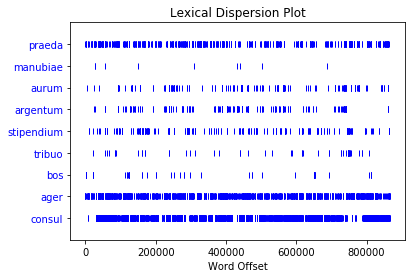

In [37]:
# use the nltk dispersion plot function to show how words we are interested in are spread across a text
# n.b must run TWICE before it works
mytext.dispersion_plot(["praeda", "manubiae", "aurum", "argentum", "stipendium", "tribuo", "bos", "ager", "consul"])

In [38]:
fdist1 = FreqDist(mytext)

In [39]:
print(fdist1)

<FreqDist with 54985 samples and 866395 outcomes>


In [40]:
# let's get a list of word counts throughout Livy
# praeda is in the top 250 nouns or verbs list
# we could further refine this to work with only nouns
fdist1.most_common(250)

[('punc', 79581),
 ('-que', 18474),
 ('cum2', 6484),
 ('res', 3876),
 ('romanus', 3812),
 ('consul', 3758),
 ('omnis', 3674),
 ('bellum', 3494),
 ('se', 3027),
 ('hostis', 2867),
 ('inde', 2748),
 ('facio', 2319),
 ('esse', 2302),
 ('dies', 2269),
 ('quod', 2260),
 ('urbs', 2221),
 ('exercitus', 2170),
 ('senatus', 2160),
 ('quoque', 2088),
 ('magnus', 2046),
 ('alius', 1944),
 ('erat', 1939),
 ('habeo', 1856),
 ('eo', 1791),
 ('a', 1744),
 ('miles', 1728),
 ('rex', 1722),
 ('primus', 1720),
 ('castrum', 1703),
 ('esset', 1701),
 ('pars', 1655),
 ('populus', 1575),
 ('do', 1550),
 ('mille', 1547),
 ('nihil', 1510),
 ('publicus', 1500),
 ('duo', 1474),
 ('multus', 1452),
 ('mitto', 1423),
 ('animus', 1414),
 ('ibi', 1398),
 ('arma', 1378),
 ('causa', 1372),
 ('legatus', 1302),
 ('capio', 1274),
 ('pater', 1228),
 ('sunt', 1221),
 ('itaque', 1204),
 ('eques', 1202),
 ('id', 1182),
 ('tempus', 1179),
 ('satis', 1174),
 ('ea', 1174),
 ('ager', 1166),
 ('annus', 1164),
 ('simul', 1130),
 ('

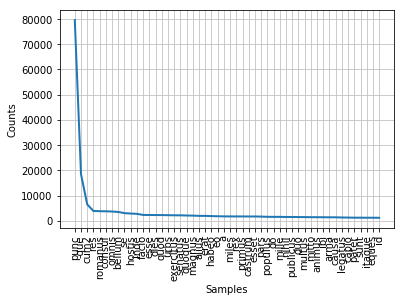

In [41]:
# let's look at a graph of word occurences
fdist1.plot(50, cumulative=False)

In [42]:
my_bigrams = list(nltk.bigrams(mytext))

In [43]:
print(my_bigrams[100:110])

[('41', '42'), ('42', '42'), ('42', '43'), ('43', '43'), ('43', '44'), ('44', '44'), ('44', '45'), ('45', '45'), ('45', '46'), ('46', '46')]


In [44]:
def find_bigrams(keyword):
    for tuple in my_bigrams:
        if keyword in tuple:
            print(tuple)

In [45]:
find_bigrams("praeda")

('praedam', 'praeda')
('praeda', 'agris')
('latro', 'praeda')
('praeda', 'praeda')
('praeda', 'onustos')
('praedae', 'praeda')
('praeda', 'amissae')
('praedas', 'praeda')
('praeda', 'agere')
('praedam', 'praeda')
('praeda', 'vellet')
('praedam', 'praeda')
('praeda', 'portantes')
('praedae', 'praeda')
('praeda', 'studio')
('praedas', 'praeda')
('praeda', 'vicem')
('ingens', 'praeda')
('praeda', 'praeda')
('praeda', 'potens')
('punc', 'praeda')
('praeda', 'praeda')
('praeda', '-que')
('punc', 'praeda')
('praeda', 'praeda')
('praeda', 'captiuis')
('praedam', 'praeda')
('praeda', 'sperare')
('divendo', 'praeda')
('praeda', 'praeda')
('praeda', 'quadraginta')
('praedam', 'praeda')
('praeda', 'munifice')
('praedae', 'praeda')
('praeda', '-que')
('urbs', 'praeda')
('praeda', 'praeda')
('praeda', 'sperandam')
('praedae', 'praeda')
('praeda', 'esse')
('punc', 'praeda')
('praeda', 'praeda')
('praeda', 'delenire')
('praedas', 'praeda')
('praeda', 'agunt')
('magnus', 'praeda')
('praeda', 'praeda')

('praeda', 'fere')
('punc', 'praeda')
('praeda', 'praeda')
('praeda', 'occupati')
('praedae', 'praeda')
('praeda', 'fecit')
('punc', 'praeda')
('praeda', 'praeda')
('praeda', 'punc')
('praedam', 'praeda')
('praeda', 'punc')
('plenus', 'praeda')
('praeda', 'praeda')
('praeda', 'domum')
('praedam', 'praeda')
('praeda', 'praeterquam')
('praedae', 'praeda')
('praeda', 'fuit')
('praedam', 'praeda')
('praeda', 'custodiendam')
('pingo', 'praeda')
('praeda', 'praeda')
('praeda', 'fanum')
('miles', 'praeda')
('praeda', 'praeda')
('praeda', 'expleturum')
('praedae', 'praeda')
('praeda', 'alia')
('punc', 'praeda')
('praeda', 'praeda')
('praeda', 'hosti')
('praedae', 'praeda')
('praeda', 'contulerunt')
('posset', 'praeda')
('praeda', 'praeda')
('praeda', 'se')
('praedam', 'praeda')
('praeda', '-que')
('praedam', 'praeda')
('praeda', 'circumiecti')
('medium', 'praeda')
('praeda', 'praeda')
('praeda', 'administrantibus')
('punc', 'praeda')
('praeda', 'praeda')
('praeda', 'macedonica')
('praedam', 'p

In [46]:
# we are now going to build a netword of words in Livy using the co-occurence method
import networkx as nx

In [47]:
# generate a network whereby each word is connected by an edge to the words either side of it
G=nx.Graph()
for i in range(1, len(mytext)):
    G.add_edge(mytext[i-1],mytext[i])
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 54985
Number of edges: 323326
Average degree:  11.7605


In [48]:
# how many connections does each word have?
degree = nx.degree(G)

In [49]:
#degree

In [50]:
sorted_degree = sorted(dict(nx.degree(G)).items(),key=lambda x:x[1], reverse=True)

In [51]:
#show the 250 words with most connections
#these ranks will be similar to our word frequency score
for word, degree in sorted_degree[:250]:
        print(word, degree)

punc 21693
-que 6839
cum2 3749
se 2759
omnis 1985
romanus 1919
quod 1788
consul 1723
esse 1712
res 1699
bellum 1678
hostis 1568
erat 1492
inde 1396
a 1361
urbs 1335
eo 1244
alius 1217
quoque 1182
dies 1178
exercitus 1131
esset 1128
magnus 1098
miles 982
primus 979
rex 976
ea 958
senatus 951
id 931
eum 928
pars 919
eius 917
publicus 914
multus 899
erant 885
sunt 861
castrum 856
eos 822
animus 791
causa 784
arma 772
fuit 748
facio 745
sibi 741
locus 724
ager 724
prope 708
legatus 699
do 695
iis 695
quibus 685
tantus 676
pater 676
tempus 674
eorum 672
duo 669
annus 664
nihil 661
habeo 655
ibi 646
satis 639
qua 635
quid 618
plebs 617
simul 616
nunc 615
eques 615
hannibal 614
haec 609
populus 608
essent 603
roma 593
eam 584
capio 582
acies 582
mitto 565
uis 563
nauis 562
praetor 554
aduersus 536
sua 535
sit 535
praesidium 534
uelut 534
spes 533
marcus 533
paruus 532
imperium 531
consilium 529
quos 527
ipsi 526
quem 513
certamen 511
sine 511
-ne 509
dux 507
signum 507
alter 507
agmen 499
sui

In [52]:
# now we look for degree centrality. That, similarly, is a score of how close to the middle of a network a node is.
sorted_degree_centrality = sorted(nx.degree_centrality(G).items(),key=lambda x:x[1], reverse=True)

In [53]:
sorted_degree_centrality

[('punc', 0.39453295504146657),
 ('-que', 0.12438163829477666),
 ('cum2', 0.06818347155536156),
 ('se', 0.050178233667976135),
 ('omnis', 0.03610141131965663),
 ('romanus', 0.03490106212716426),
 ('quod', 0.0325185508511567),
 ('consul', 0.03133638876764149),
 ('esse', 0.031136330568892766),
 ('res', 0.030899898152189728),
 ('bellum', 0.03051796886366943),
 ('hostis', 0.02851738687618216),
 ('erat', 0.02713516659391823),
 ('inde', 0.025389204132111157),
 ('a', 0.024752655317910665),
 ('urbs', 0.02427979048450458),
 ('eo', 0.022624763567583295),
 ('alius', 0.02213371162520006),
 ('quoque', 0.021497162810999563),
 ('dies', 0.021424414375090933),
 ('exercitus', 0.020569620253164556),
 ('esset', 0.020515058926233086),
 ('magnus', 0.019969445656918376),
 ('miles', 0.017859741015568163),
 ('primus', 0.017805179688636694),
 ('rex', 0.017750618361705224),
 ('ea', 0.017423250400116396),
 ('senatus', 0.017295940637276297),
 ('id', 0.01693219845773316),
 ('eum', 0.016877637130801686),
 ('pars', 0

In [54]:
# betweeness is more interesting though. It finds the shortest path between each node on a network and then tells us
# how frequently a node is on that shortest path
# N.b. this is a VERY long computation so don't run it unless you really want to know the betweeness centrality!
# sorted_betweeness = sorted(nx.betweenness_centrality(G).items(),key=lambda x:x[1], reverse=True)
# sorted_betweeness

In [55]:
# save our network to a file that other applications can undertsand.
nx.write_gexf(G, "livy_network.gexf")